In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns


In [2]:
# # import dataset from google drive
# from google.colab import drive
# drive.mount('/content/drive')
path = "Glassdoor Gender Pay Gap.csv"
df = pd.read_csv(path)
df.head()


,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
# Convert to numerical data
df['job_title_encoded'] = le().fit_transform(df['JobTitle'])
df['department_encoded'] = le().fit_transform(df['Dept'])
df['gender_encoded'] = le().fit_transform(df['Gender'])
df['education_encoded'] = le().fit_transform(df['Education'])
df['dept_encoded'] = le().fit_transform(df['Dept'])
df.head()
df.drop(['Gender', 'JobTitle', 'Education', 'Dept', 'dept_encoded'], axis=1)


,Age,PerfEval,Seniority,BasePay,Bonus,job_title_encoded,department_encoded,gender_encoded,education_encoded
0,18,5,2,42363,9938,3,3,0,0
1,21,5,5,108476,11128,8,2,1,0
2,19,4,5,90208,9268,9,0,0,3
3,20,5,4,108080,10154,8,4,1,2
4,26,5,5,99464,9319,3,1,1,2
...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,3270,6,0,0,1
996,57,1,2,108977,3567,0,4,1,2
997,48,1,1,92347,2724,2,3,1,1
998,65,2,1,97376,2225,2,0,1,1


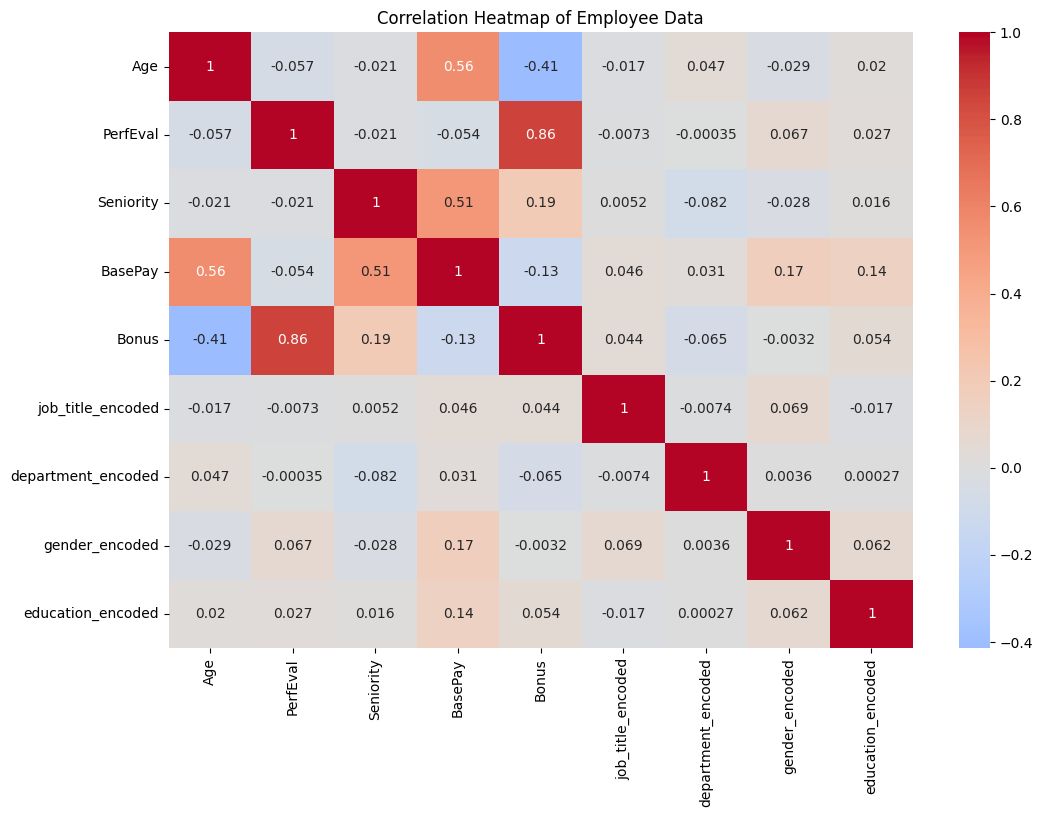

In [5]:
# correlation heatmap
numerical_columns = ['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus',
                    'job_title_encoded', 'department_encoded',
                    'gender_encoded', 'education_encoded']
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Employee Data')
plt.show()


In [6]:

# features for prediction
features = ['Age', 'PerfEval', 'Seniority', 'Bonus',
                    'job_title_encoded', 'department_encoded',
                    'gender_encoded', 'education_encoded']

x = df[features]
y = df['BasePay'] #Target variable


In [7]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [8]:
# train model
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_leaf=4
    )

models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}


In [10]:
# Train and evaluate models
for name, model in models.items():
  model.fit(x_train_scaled, y_train)

  train_pred = model.predict(x_train_scaled)
  test_pred = model.predict(x_test_scaled)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)

  print(f'\n{name} Results:')
  print(f'Train RMSE: ${train_rmse:,.2f}')
  print(f'Test RMSE: ${test_rmse:,.2f}')
  print(f'Train R2: {train_r2:.4f}')
  print(f'Test R2: {test_r2:.4f}')



Linear Regression Results:
Train RMSE: $15,020.99
Test RMSE: $14,580.67
Train R2: 0.6493
Test R2: 0.6642

Decision Tree Results:
Train RMSE: $14,581.15
Test RMSE: $17,397.59
Train R2: 0.6695
Test R2: 0.5219

Random Forest Results:
Train RMSE: $9,673.99
Test RMSE: $13,661.64
Train R2: 0.8545
Test R2: 0.7052


In [11]:
# Find best perfoming model
best_model = None
best_test_r2 = 0
for name, model in models.items():
  test_pred = model.predict(x_test_scaled)
  test_r2 = r2_score(y_test, test_pred)
  if test_r2 > best_test_r2:
    best_model = model
    best_test_r2 = test_r2

    print(f'Best model: {best_model}')
    print(f'Best Test R2: {best_test_r2:.4f}')

Best model: LinearRegression()
Best Test R2: 0.6642
Best model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)
Best Test R2: 0.7052


In [12]:
 # save model as .pkl file
import joblib
joblib.dump(best_model, 'best_salary_model.pkl')
joblib.dump(scaler, 'salary_scaler.pkl')

['salary_scaler.pkl']